In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('prenoms.csv', sep= ";")

In [4]:
data

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [5]:
data = data[data['preusuel'] != "_PRENOMS_RARES"]

In [6]:
data

,sexe,preusuel,annais,nombre
122,1,A,1980,3
123,1,A,1998,3
124,1,A,XXXX,21
125,1,AADAM,2009,4
126,1,AADAM,2014,3
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [7]:
data = data[data['preusuel'].str.len() >= 3]

In [8]:
data

,sexe,preusuel,annais,nombre
125,1,AADAM,2009,4
126,1,AADAM,2014,3
127,1,AADAM,2015,3
128,1,AADAM,2016,4
129,1,AADAM,2017,4
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [9]:
data.rename(columns={'preusuel': 'name'}, inplace=True)

<ipython-input-9-379ab1e21e96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'preusuel': 'name'}, inplace=True)


In [10]:
data['name'] = data['name'].str.replace(r'[^\w\s]+', '')

<ipython-input-10-302d3f306a79>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['name'] = data['name'].str.replace(r'[^\w\s]+', '')
<ipython-input-10-302d3f306a79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].str.replace(r'[^\w\s]+', '')


In [11]:
data.dropna(inplace= True)

<ipython-input-11-bb1feb185f41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace= True)


In [12]:
data['name'] = data['name'].str.replace('\d+', '')

<ipython-input-12-cd106fe6d5ea>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['name'] = data['name'].str.replace('\d+', '')
<ipython-input-12-cd106fe6d5ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].str.replace('\d+', '')


In [13]:
data.name = data.name.str.strip()

<ipython-input-13-4f954ee075ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.name = data.name.str.strip()


In [14]:
vowels = ('a','e','i','o','u')

In [15]:
data['sexe'] = data['sexe'].replace({1: 'm', 2: 'f'})
df = data.assign(isVowel = lambda x: x.name.str.endswith(vowels).astype('int'))
df['NameLen'] = df['name'].str.len()


<ipython-input-15-2ee530031ed8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sexe'] = data['sexe'].replace({1: 'm', 2: 'f'})


In [17]:
df['name'] = df["name"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [18]:
df.groupby(['sexe'])['NameLen'].mean()

sexe
f    6.594147
m    6.289723
Name: NameLen, dtype: float64

<Axes: xlabel='sexe,NameLen'>

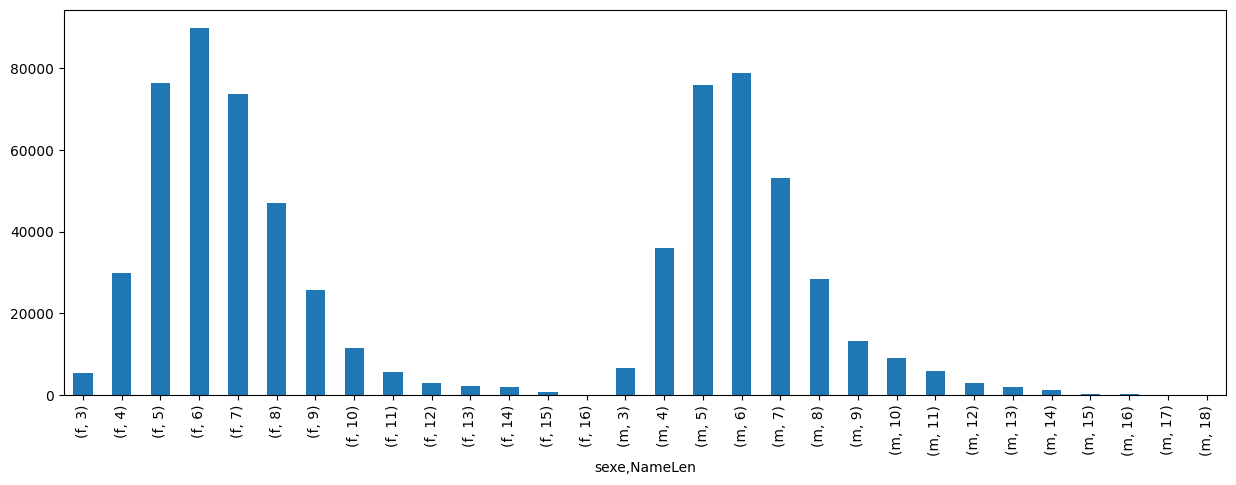

In [19]:
df.groupby(['sexe','NameLen'])['name'].count().plot(kind = 'bar',figsize=(15,5))

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:

le.fit(df.sexe)
df.sexe = le.transform(df.sexe)

In [ ]:
le.classes_

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
n=3
vect = CountVectorizer(analyzer=lambda x: (x[-i-1:] for i in range(0,min(n,len(x)))))

In [25]:
vect.fit(df.name)

CountVectorizer(analyzer=<function <lambda> at 0x7dd7cfc3acb0>)

In [26]:
mat = vect.transform(df.name).todense()

In [27]:
grams = pd.DataFrame(mat, columns=vect.get_feature_names_out())

In [28]:
grams

,,,A,S,A,AH,AL,AM,AN,AR,...,ZUA,ZUL,ZUR,ZY,ZYA,ZYO,ZZ,ZZA,ZZO,ZZY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
grams.shape

(685523, 3369)

In [ ]:
new_df = df.join(grams)

In [4]:
!git push

fatal: not a git repository (or any of the parent directories): .git
